# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
colorgrouped = diamonds.groupby(by="color", as_index=False).agg("mean")
colorgrouped.describe()

,color,carat,clarity,depth,table,price,x,y,z
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3.000000,0.618815,3.068333,61.791017,57.376362,2088.325735,5.336571,5.340501,3.298730
std,2.160247,0.092972,0.270130,0.111191,0.130144,234.437670,0.248046,0.245810,0.157873
min,0.000000,0.538501,2.697848,61.661686,57.193104,1851.291142,5.125239,5.130121,3.163511
25%,1.500000,0.548516,2.898220,61.698403,57.316176,1896.306234,5.145874,5.151694,3.177726
50%,3.000000,0.579122,3.140706,61.774587,57.368547,2030.942776,5.239984,5.245938,3.234510
75%,4.500000,0.663752,3.166920,61.889235,57.412797,2231.042268,5.452217,5.455105,3.375007
max,6.000000,0.789546,3.509499,61.925573,57.614934,2481.349225,5.794595,5.793854,3.587622


In [4]:
#your comments here
# In all columns, the variability is very low, probably due to the grouping operation
# that reduced the total number of records to 7.

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
#your hypotheses here
# Color and clarity are both determined by the quality of the diamond.
# Carat, x, y and z are all related to the physical features of the diamond.
# Assuming that higher quality and larger diamonds are priced differently than
# low quality and smaller diamonds, these should be related.

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [8]:
#your code here
# already done previously... probably wasn't supposed to do it before then?...
colorgrouped

,color,carat,clarity,depth,table,price,x,y,z
0,0,0.789546,2.792074,61.924871,57.614934,2481.349225,5.794595,5.793854,3.587622
1,1,0.681982,3.187482,61.925573,57.335429,2225.406967,5.503897,5.508519,3.409459
2,2,0.645521,3.140706,61.853600,57.398269,2236.677570,5.400537,5.401691,3.340556
3,3,0.555601,3.509499,61.774587,57.193104,1851.291142,5.162649,5.168036,3.191549
4,4,0.579122,3.146358,61.691666,57.368547,2030.942776,5.239984,5.245938,3.234510
5,5,0.541431,3.004366,61.661686,57.427326,1871.028260,5.129099,5.135351,3.163903
6,6,0.538501,2.697848,61.705140,57.296923,1921.584208,5.125239,5.130121,3.163511


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
#your thoughts here
# 0 is supposed the represent the worst color and 6 the best,
# yes the prices do not follow this progression. The highest mean price
# is the one for the worst color.

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

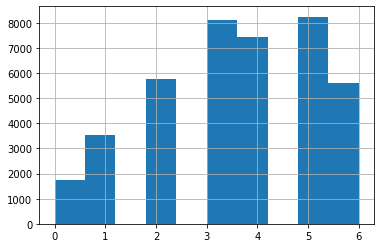

In [38]:
#your code here
diamonds["color"].hist()

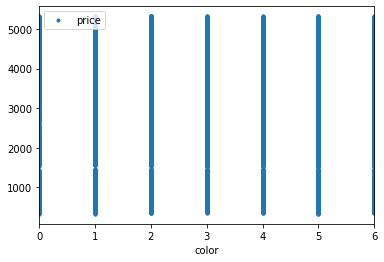

In [19]:
#your comments here
# Diamonds with worse colors (0) are less frequent than those with the best colors (6).

diamonds.plot(x="color", y="price", style=".")
#There are also diamonds of all price ranges for each color.

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [22]:
#your code here
caratgrouped = diamonds.groupby(by="carat", as_index=False).agg("mean")
caratgrouped

,carat,color,clarity,depth,table,price,x,y,z
0,0.20,5.166667,2.833333,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333
1,0.21,5.444444,2.666667,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222
2,0.22,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000
3,0.23,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468
4,0.24,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591
...,...,...,...,...,...,...,...,...,...
137,1.74,2.000000,0.000000,63.200000,55.000000,4677.000000,7.620000,7.590000,4.800000
138,1.83,0.000000,0.000000,70.000000,58.000000,5083.000000,7.340000,7.280000,5.120000
139,1.95,2.000000,0.000000,60.300000,59.000000,5045.000000,8.100000,8.050000,4.870000
140,2.00,0.000000,0.000000,61.500000,59.000000,5051.000000,8.110000,8.060000,4.970000


In [23]:
#your comments
# There are now more rows than when grouping by color. Variance should be higher.


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

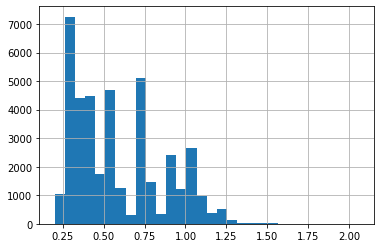

In [39]:
#your code here
diamonds["carat"].hist(bins=30)

In [ ]:
# There are more small diamonds in the catalog than large ones.

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [40]:
#your code here
tablegrouped = diamonds.groupby(by="table", as_index=False).agg("mean")
tablegrouped

,table,carat,color,clarity,depth,price,x,y,z
0,43.0,1.0400,1.00,4.00,62.90,4997.00,6.45000,6.41000,4.04000
1,44.0,0.2900,5.00,4.00,62.80,474.00,4.20000,4.24000,2.65000
2,49.0,0.6500,3.00,3.00,64.25,2290.50,5.35500,5.32000,3.42500
3,50.0,1.0200,4.00,2.00,61.80,4227.00,6.59000,6.51000,4.05000
4,50.1,0.9400,2.00,1.00,66.00,3353.00,6.13000,6.17000,4.06000
...,...,...,...,...,...,...,...,...,...
120,70.0,0.7175,2.75,2.75,58.15,2189.25,5.89875,5.79375,3.40125
121,71.0,0.6800,3.00,2.00,58.00,1633.00,5.85000,5.70000,3.35000
122,73.0,0.6025,4.50,3.25,68.90,2406.50,5.52000,5.46500,3.74500
123,76.0,0.7900,3.00,2.00,65.30,2362.00,5.52000,5.13000,3.35000


In [43]:
tablegrouped.describe()

,table,carat,color,clarity,depth,price,x,y,z
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,58.630400,0.616083,3.077166,3.340261,61.524552,2071.967410,5.359141,5.382186,3.301225
std,5.319566,0.144110,0.771187,0.798156,1.612566,744.334394,0.427687,0.419422,0.250221
min,43.000000,0.290000,0.000000,1.000000,57.040000,474.000000,4.200000,4.240000,2.650000
25%,55.200000,0.511334,2.750000,2.800000,60.871429,1631.285714,5.064000,5.094286,3.142857
50%,58.300000,0.611429,3.062500,3.333333,61.800000,2010.500000,5.355000,5.384257,3.313333
75%,61.400000,0.700584,3.500000,4.000000,62.188889,2362.000000,5.620000,5.667500,3.425000
max,79.000000,1.040000,5.000000,5.000000,68.900000,5056.000000,6.590000,6.570000,4.060000


In [41]:
#your comments here
# Once again the number of rows is in the hundreds which yields more
# variance than when grouped by color.

**Finally, do the same with the `clarity` column.**

In [42]:
#your code here
claritygrouped = diamonds.groupby(by="clarity", as_index=False).agg("mean")
claritygrouped

,clarity,carat,color,depth,table,price,x,y,z
0,0,1.012202,3.083481,62.630373,58.406572,2669.840142,6.334121,6.280835,3.948355
1,1,0.822391,3.699925,61.779639,57.861878,2927.309091,5.918738,5.913265,3.653975
2,2,0.657505,3.611845,61.885713,57.602189,2301.057411,5.465231,5.467315,3.382279
3,3,0.531536,3.733356,61.725204,57.256663,1758.177647,5.106031,5.109989,3.152981
4,4,0.508451,3.317452,61.679777,57.179051,1704.836797,5.040635,5.050877,3.112063
5,5,0.432759,3.626382,61.663769,56.958317,1454.187186,4.791229,4.805776,2.958090
6,6,0.407424,3.358391,61.626388,56.831628,1381.769495,4.708150,4.723260,2.906285
7,7,0.387599,3.036184,61.514145,56.321908,1338.143421,4.654000,4.675691,2.868658


In [ ]:
#your comments here
# Grouping by carat yields 8 rows, so variance is once again very low.
# Mean prices seem to follow along the clarity sequence, even though
# clarity 7 is supposed to be the best type.

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [44]:
#your thoughts here
# It is difficult to say after looking only at the means because the greater amount
# of lower quality/smaller diamonds than high quality ones might be skewing the results,
# especially for variables like carat and color that have a very limited number of possible values.

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


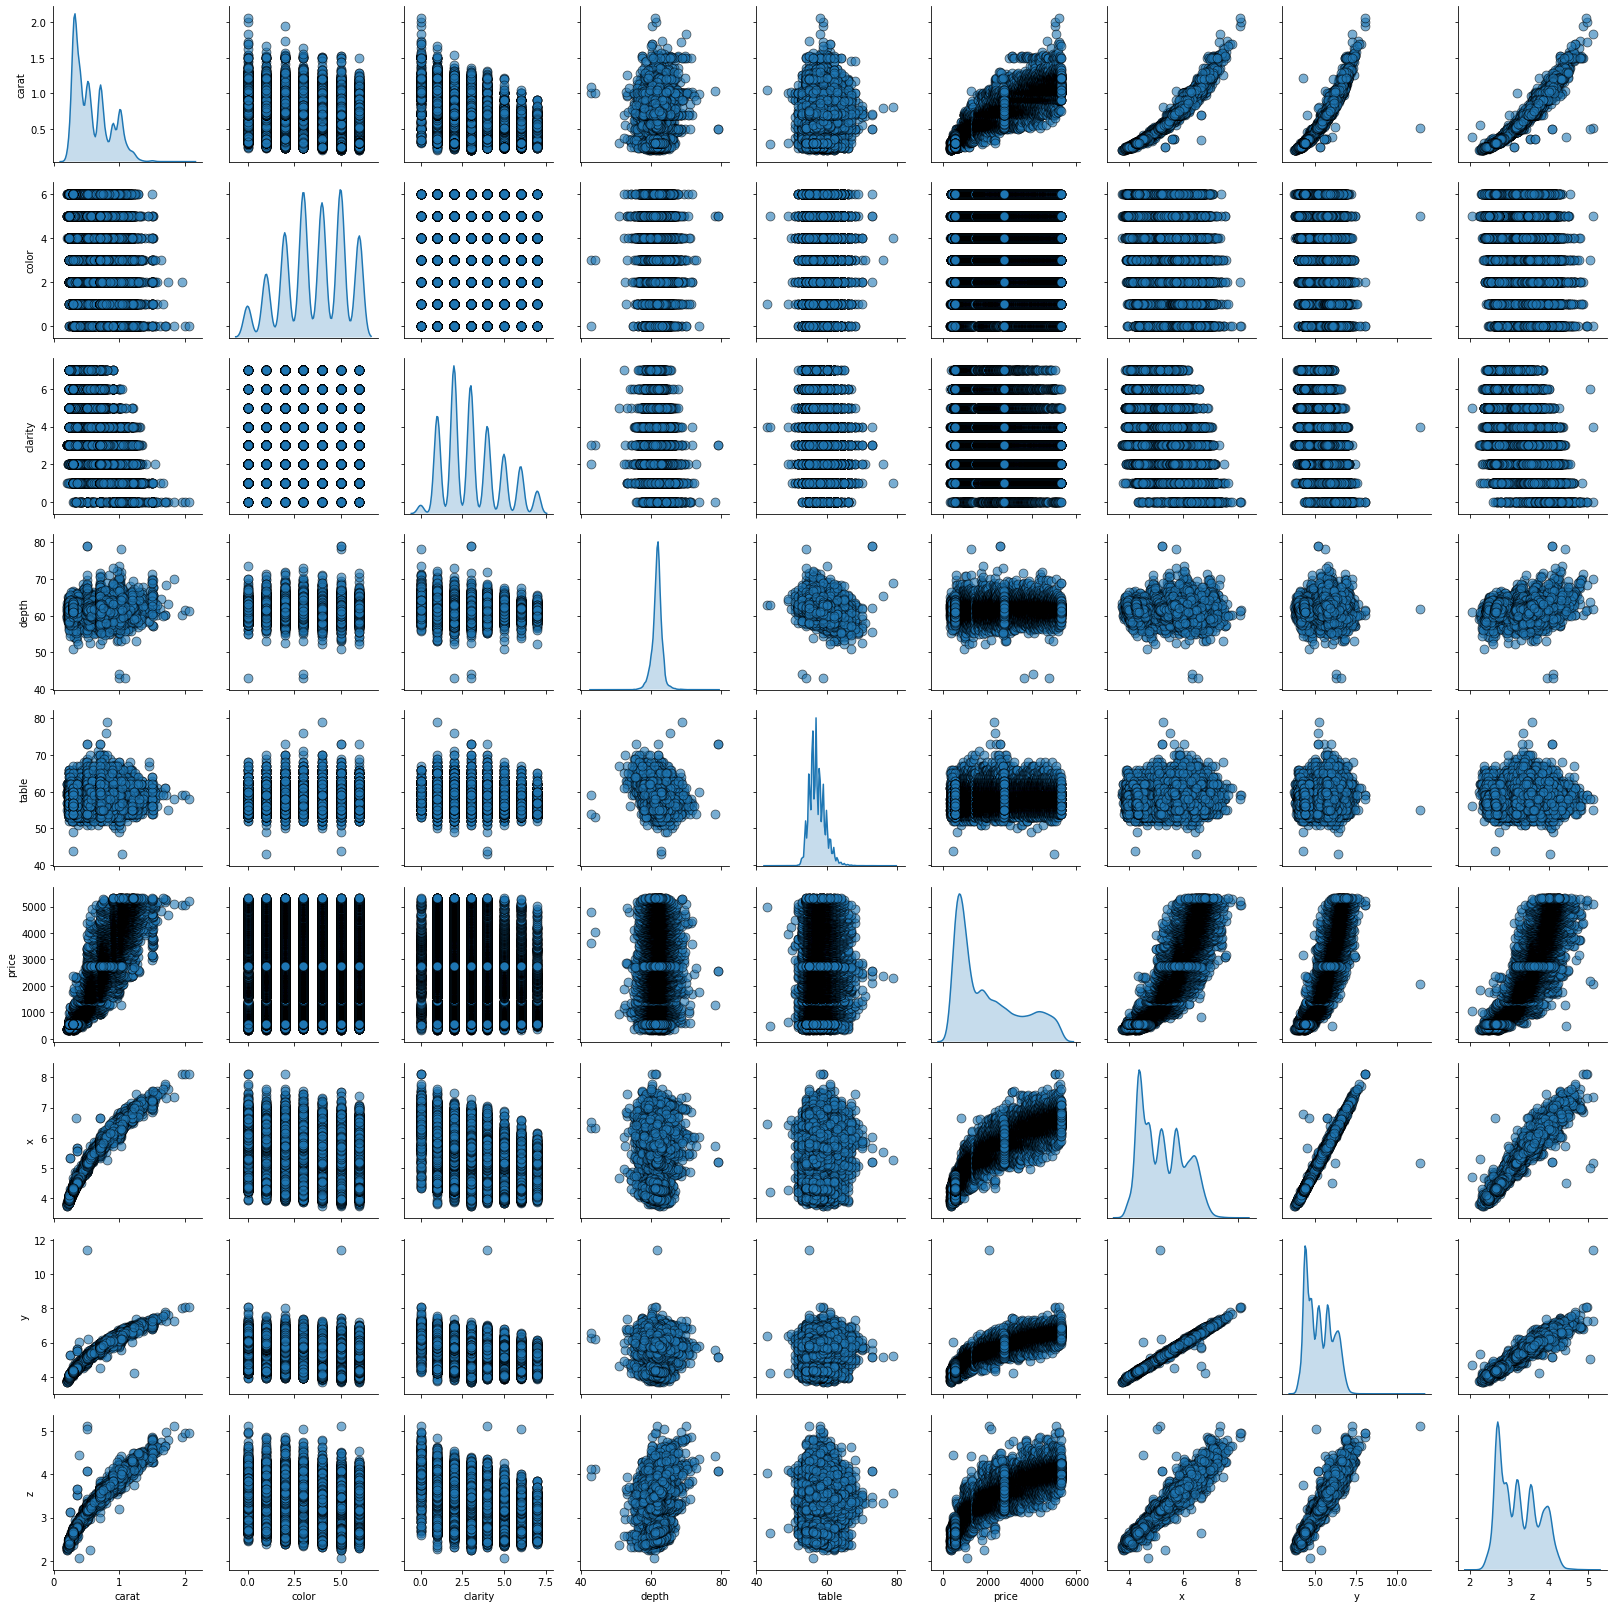

In [45]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here
# The relationships between:
#    * carat and x, y, z, which is expected, because heavier diamonds will also be larger
#    * price and carat, x, y, z, also expected that bigger and heavier diamonds will be more expensive
#    * x, y and z, also not surprising because diamonds are usually cut in harmonious, proportional, shapes

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

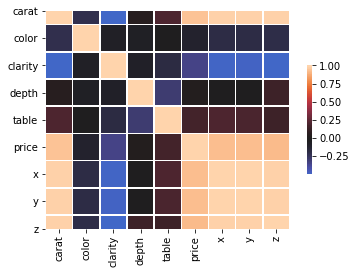

In [47]:
# your code here
corr = diamonds.corr()

sns.heatmap(corr, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

**What do you see here? Regarding the results before, does it fit with them?**

In [48]:
#your thoughts here
# The same conclusions as before can be drawn form this correlation matrix plot.

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

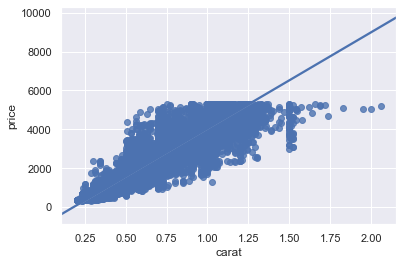

In [56]:
# your code here
sns.regplot(x="carat", y="price", data=diamonds)

In [72]:
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds["carat"],diamonds["price"])
print("Std error:", std_err)

Std error: 8.596990123864986


**What do you think?**

In [71]:
#your thoughts here
print(r_value**2)

0.8911634223023379


In [ ]:
# The R-squared value tells us that the independent variable, "carat", influences "price" by almost 90%.
# There is a very strong positive correlation between the two variables.

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here
# I expect that there will also be a strong positive correlation between (price, x), (price, y), (price, z).

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.